In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
airbnb = pd.read_excel('/Users/FeliciaWilliams/Documents/GitHub/GA_Projects/Project 4/listings.xlsm')

In [110]:
airbnb.shape

(21450, 29)

In [111]:
airbnb.head()

name  \
0                          Beautiful Room & House   
1        Room in Cool Deco Apartment in Brunswick   
2  Cool Chic Beachside 1 BR Views APT+Garage+WIFI   
3                Large private room-close to city   
4                Melbourne BnB near City & Sports   

                                             summary  \
0                                                NaN   
1  A large air conditioned room with queen spring...   
2  RIGHT IN THE HEART OF ST KILDA! It doesn't get...   
3  Comfortable, relaxed house, a home away from  ...   
4                                                NaN   

                                               space host_response_time  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...                NaN   
1  The apartment is Deco/Edwardian in style and h...     within an hour   
2  FREE WiFi FREE housekeeping for 9+ night stays...     within an hour   
3  The atmosphere is relaxed and easy going. You ...                NaN   
4  We offer comfortable accommodation in Inner Me...                NaN   

   host_response_rate host_is_superhost host_identity_verified   latitude  \
0                 NaN                 f                      f -37.772684   
1                 1.0                 f                      t -37.766505   
2                 1.0                 t                      t -37.859755   
3                 NaN                 f                      t -37.758971   
4                 NaN                 f                      t -37.864530   

    longitude property_type        ...         review_scores_rating  \
0  145.092133         House        ...                         90.0   
1  144.980736     Apartment        ...                         86.0   
2  144.977369     Apartment        ...                         97.0   
3  144.989228         House        ...                         94.0   
4  144.992238         House        ...                         89.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     9.0                       10.0                   10.0   
1                     9.0                        8.0                    9.0   
2                    10.0                       10.0                   10.0   
3                     9.0                        9.0                   10.0   
4                     9.0                        9.0                   10.0   

   review_scores_communication review_scores_location  review_scores_value  \
0                         10.0                    9.0                  9.0   
1                          9.0                    9.0                  9.0   
2                         10.0                   10.0                  9.0   
3                         10.0                    9.0                  9.0   
4                         10.0                    9.0                  9.0   

           cancellation_policy  calculated_host_listings_count  \
0  strict_14_with_grace_period                               1   
1                     moderate                               1   
2  strict_14_with_grace_period                              17   
3                     moderate                               3   
4                     moderate                               1   

   reviews_per_month  
0               0.05  
1               1.44  
2               0.13  
3               0.31  
4               0.73  

[5 rows x 29 columns]

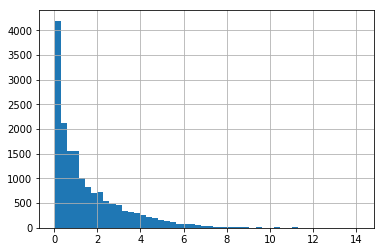

In [112]:
airbnb.reviews_per_month.hist(bins=50)

In [113]:
airbnb.isna().sum()

name                                  5
summary                             529
space                              5702
host_response_time                 6323
host_response_rate                 6323
host_is_superhost                     4
host_identity_verified                4
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            22
bedrooms                              5
beds                                 28
amenities                             0
square_feet                       21225
price                                 0
number_of_reviews                     0
review_scores_rating               5119
review_scores_accuracy             5135
review_scores_cleanliness          5127
review_scores_checkin              5149
review_scores_communication        5133
review_scores_location             5151


In [114]:
#As most of the data in square_feet is unavailable, to remove that column
airbnb.drop('square_feet', axis=1, inplace=True)

In [115]:
airbnb.shape

(21450, 28)

In [116]:
airbnb.isna().sum()

name                                 5
summary                            529
space                             5702
host_response_time                6323
host_response_rate                6323
host_is_superhost                    4
host_identity_verified               4
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           22
bedrooms                             5
beds                                28
amenities                            0
price                                0
number_of_reviews                    0
review_scores_rating              5119
review_scores_accuracy            5135
review_scores_cleanliness         5127
review_scores_checkin             5149
review_scores_communication       5133
review_scores_location            5151
review_scores_value               5153
cancellation_policy      

# Consideration 1: To consider how to deal with all the empty rows.

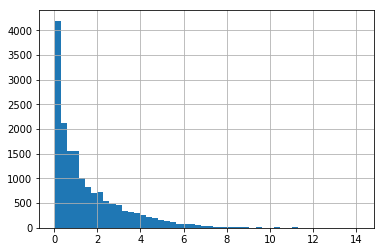

In [117]:
airbnb.reviews_per_month.hist(bins=50)

In [118]:
def f(row):
    if row['reviews_per_month'] <= 1:
        val = 0
    elif row['reviews_per_month'] <= 2:
        val = 1
    elif row['reviews_per_month'] <= 3:
        val = 2
    elif row['reviews_per_month'] <= 4:
        val = 3    
    else:
        val = 4
    return val

airbnb['popular'] = airbnb.apply(f, axis=1)

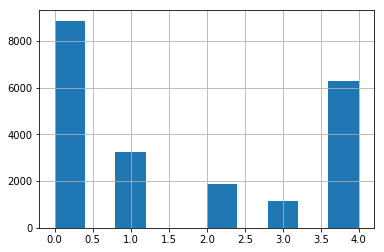

In [119]:
airbnb.popular.hist()

In [120]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in airbnb['popular']:
    if i == 0:
        count0 += 1
    elif i == 1:
        count1 += 1
    elif i == 2:
        count2 += 1
    elif i == 3:
        count3 += 1
    else:
        count4 += 1

total = count0 + count1 + count2 + count3 + count4
print('0: ' + str(count0) + " - " + str(round(count0/total,2)*100) +"%")
print('1: ' + str(count1) + " - " + str(round(count1/total,2)*100) +"%")
print('2: ' + str(count2) + " - " + str(round(count2/total,2)*100) +"%")
print('3: ' + str(count3) + " - " + str(round(count3/total,2)*100) +"%")
print('4: ' + str(count4) + " - " + str(round(count4/total,2)*100) +"%")

0: 8874 - 41.0%
1: 3255 - 15.0%
2: 1885 - 9.0%
3: 1156 - 5.0%
4: 6280 - 28.999999999999996%


# Consideration 2: To consider how many bins to use in classifying the target column.

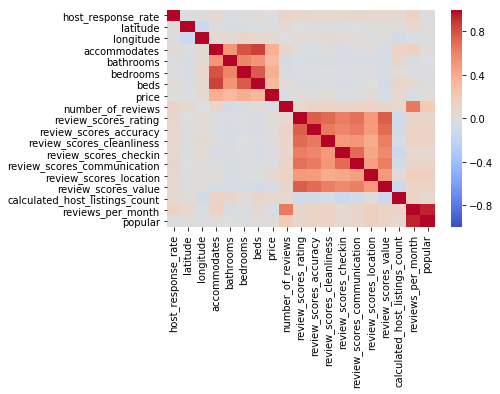

In [121]:
sns.heatmap(airbnb.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

In [122]:
airbnb.corr()

host_response_rate  latitude  longitude  \
host_response_rate                        1.000000  0.005272   0.002955   
latitude                                  0.005272  1.000000  -0.126179   
longitude                                 0.002955 -0.126179   1.000000   
accommodates                              0.061872 -0.018084   0.054433   
bathrooms                                -0.028613 -0.043329   0.061808   
bedrooms                                  0.008793 -0.043175   0.095466   
beds                                      0.035825 -0.026574   0.065523   
price                                    -0.000200 -0.005755   0.054351   
number_of_reviews                         0.118943  0.062461  -0.002219   
review_scores_rating                      0.087751 -0.000050   0.043934   
review_scores_accuracy                    0.085649  0.015624   0.026855   
review_scores_cleanliness                 0.085154  0.000310   0.052076   
review_scores_checkin                     0.063472 -0.013321   0.045524   
review_scores_communication               0.092157 -0.003945   0.029190   
review_scores_location                    0.067235  0.011149   0.000187   
review_scores_value                       0.072377  0.001091   0.017118   
calculated_host_listings_count            0.062477  0.029805  -0.073214   
reviews_per_month                         0.145721  0.082911  -0.028767   
popular                                  -0.008118  0.018021  -0.016146   

                                accommodates  bathrooms  bedrooms      beds  \
host_response_rate                  0.061872  -0.028613  0.008793  0.035825   
latitude                           -0.018084  -0.043329 -0.043175 -0.026574   
longitude                           0.054433   0.061808  0.095466  0.065523   
accommodates                        1.000000   0.522629  0.803798  0.861536   
bathrooms                           0.522629   1.000000  0.599461  0.517916   
bedrooms                            0.803798   0.599461  1.000000  0.767720   
beds                                0.861536   0.517916  0.767720  1.000000   
price                               0.381421   0.314450  0.389789  0.335570   
number_of_reviews                   0.086230  -0.057391 -0.032642  0.038877   
review_scores_rating               -0.019616  -0.027085 -0.008369 -0.036490   
review_scores_accuracy             -0.027050  -0.046059 -0.026693 -0.042574   
review_scores_cleanliness           0.000412  -0.041235 -0.005971 -0.023904   
review_scores_checkin              -0.031663  -0.035458 -0.019685 -0.035529   
review_scores_communication        -0.017372  -0.042556 -0.018709 -0.025873   
review_scores_location              0.026377  -0.042527 -0.009893 -0.006680   
review_scores_value                -0.053011  -0.054362 -0.042340 -0.059674   
calculated_host_listings_count      0.132690   0.091331  0.037635  0.091546   
reviews_per_month                   0.137636  -0.046377 -0.019726  0.068733   
popular                             0.028533  -0.000181 -0.017770  0.010672   

                                   price  number_of_reviews  \
host_response_rate             -0.000200           0.118943   
latitude                       -0.005755           0.062461   
longitude                       0.054351          -0.002219   
accommodates                    0.381421           0.086230   
bathrooms                       0.314450          -0.057391   
bedrooms                        0.389789          -0.032642   
beds                            0.335570           0.038877   
price                           1.000000          -0.028100   
number_of_reviews              -0.028100           1.000000   
review_scores_rating            0.032243           0.072838   
review_scores_accuracy          0.008117           0.115649   
review_scores_cleanliness       0.040297           0.103140   
review_scores_checkin          -0.020670           0.099774   
review_scores_communication    -0.010852           0.112282   
revie

From the heatmap above, we can see 2 main areas of possible multicollinearity between features.

Group 1:
- accommodates
- bathrooms
- bedrooms
- beds
Which makes sense because all these deal with the number of people that the property can host. As such, it might be better to focus only on one of the features (e.g. accommodates only).

Group 2:
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_location
- review_scores_value
Which makes sense because all these have to do with a guest's impression of the property. The easier way would be to use only the review_scores_rating, which is most probably a combination of all the different review scores.

However, I am inclined to look at the individual factors which might not be as correlated based on the numbers and the intuitive explanation.

According to airbnb website, this is the description for their review factors:
- Cleanliness. Did your guests feel that your space was clean and tidy?
- Accuracy. How accurately did your listing page represent your space?
- Value. Did your guest feel your listing provided good value for the price?
- Communication. How well did you communicate with your guest before and during their stay?
- Arrival/Check-in. How smoothly did their check-in go?
- Location. How did guests feel about your neighbourhood?


### As such, I will be proposing to drop these other columns:
- bathrooms
- bedrooms
- beds
- review_scores_rating

# Consideration 3: To confirm which columns to drop depending on the correlation matrix and whether I think the columns play a significant part in the attractiveness of the property.

In [123]:
airbnb.dtypes

name                               object
summary                            object
space                              object
host_response_time                 object
host_response_rate                float64
host_is_superhost                  object
host_identity_verified             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
amenities                          object
price                               int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            

In [124]:
airbnb.shape

(21450, 29)

In [125]:
airbnb.nunique()

name                              21042
summary                           19570
space                             14651
host_response_time                    4
host_response_rate                   59
host_is_superhost                     2
host_identity_verified                2
latitude                          21450
longitude                         21450
property_type                        37
room_type                             3
accommodates                         16
bathrooms                            19
bedrooms                             12
beds                                 19
amenities                         20437
price                               492
number_of_reviews                   281
review_scores_rating                 48
review_scores_accuracy                9
review_scores_cleanliness             9
review_scores_checkin                 9
review_scores_communication           9
review_scores_location                8
review_scores_value                   9


Out of the current dataframe of 29 columns,
27 - Feature Columns
1 - Target Column (i.e. reviews_per_month)
1 - Modified Target Column (i.e. popular based on binned reviews_per_month)

Out of the 27 feature columns, these are identified as object columns:
- name                   - free text
- summary                - free text
- space                  - free text
- host_response_time     - categorical (4)
- host_is_superhost      - boolean (2)
- host_identity_verified - boolean (2)
- property_type          - categorical (37)
- room_type              - categorical (3)
- amenities              - free text
- cancellation_policy    - categorical (5)

As such, one hot encoding / get dummies will probably be used for the categorical features, but will need to see how to best use the features that are based on free text.

# Consideration 4: To consider how to best use the features with free text (e.g. name, summary, space, amenities)